In [2385]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA


plt.style.use("seaborn-v0_8-darkgrid")

raw_products = pd.read_csv("fr.openfoodfacts.org.products.csv", delimiter="\t")

/var/folders/ht/r34_b3vj4p7c88ck54235g_40000gn/T/ipykernel_3563/1551880776.py:19: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_products = pd.read_csv("fr.openfoodfacts.org.products.csv", delimiter="\t")


# Data Exploration

In [2386]:
general_information = [
    "code",
    "url",
    "creator",
    "created_t",
    "created_datetime",
    "last_modified_t",
    "last_modified_datetime",
    "product_name",
    "generic_name",
    "quantity",
]

tags = [
    "pnns_groups_1",
    "pnns_groups_2",
    "packaging",
    "packaging_tags",
    "brands",
    "brands_tags",
    "categories",
    "categories_tags",
    "categories_fr",
    "origins",
    "origins_tags",
    "manufacturing_places",
    "manufacturing_places_tags",
    "labels",
    "labels_tags",
    "labels_fr",
    "emb_codes",
    "emb_codes_tags",
    "first_packaging_code_geo",
    "cities",
    "cities_tags",
    "states",
    "states_fr",
    "states_tags",
    "purchase_places",
    "stores",
    "countries",
    "countries_tags",
    "countries_fr",
]

ingredients = [
    "ingredients_text",
    "traces",
    "traces_fr",
    "traces_tags",
]

misc_data = [
    "serving_size",
    "no_nutriments",
    "additives_n",
    "additives",
    "additives_fr",
    "additives_tags",
    "allergens",
    "allergens_fr",
    "ingredients_from_palm_oil_n",
    "ingredients_from_palm_oil",
    "ingredients_from_palm_oil_tags",
    "ingredients_that_may_be_from_palm_oil_n",
    "ingredients_that_may_be_from_palm_oil",
    "ingredients_that_may_be_from_palm_oil_tags",
    "nutrition_grade_fr",
    "main_category",
    "main_category_fr",
    "image_url",
    "image_small_url",
]

nutrition_facts = [
    "energy_100g",
    "energy-from-fat_100g",
    "fat_100g",
    "saturated-fat_100g",
    "butyric-acid_100g",
    "caproic-acid_100g",
    "caprylic-acid_100g",
    "capric-acid_100g",
    "lauric-acid_100g",
    "myristic-acid_100g",
    "palmitic-acid_100g",
    "stearic-acid_100g",
    "arachidic-acid_100g",
    "behenic-acid_100g",
    "lignoceric-acid_100g",
    "cerotic-acid_100g",
    "montanic-acid_100g",
    "melissic-acid_100g",
    "monounsaturated-fat_100g",
    "polyunsaturated-fat_100g",
    "omega-3-fat_100g",
    "alpha-linolenic-acid_100g",
    "eicosapentaenoic-acid_100g",
    "docosahexaenoic-acid_100g",
    "omega-6-fat_100g",
    "linoleic-acid_100g",
    "arachidonic-acid_100g",
    "gamma-linolenic-acid_100g",
    "dihomo-gamma-linolenic-acid_100g",
    "omega-9-fat_100g",
    "oleic-acid_100g",
    "elaidic-acid_100g",
    "gondoic-acid_100g",
    "mead-acid_100g",
    "erucic-acid_100g",
    "nervonic-acid_100g",
    "trans-fat_100g",
    "cholesterol_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "sucrose_100g",
    "glucose_100g",
    "fructose_100g",
    "lactose_100g",
    "maltose_100g",
    "maltodextrins_100g",
    "starch_100g",
    "polyols_100g",
    "fiber_100g",
    "proteins_100g",
    "casein_100g",
    "serum-proteins_100g",
    "nucleotides_100g",
    "salt_100g",
    "sodium_100g",
    "alcohol_100g",
    "vitamin-a_100g",
    "beta-carotene_100g",
    "vitamin-d_100g",
    "vitamin-e_100g",
    "vitamin-k_100g",
    "vitamin-c_100g",
    "vitamin-b1_100g",
    "vitamin-b2_100g",
    "vitamin-pp_100g",
    "vitamin-b6_100g",
    "vitamin-b9_100g",
    "folates_100g",
    "vitamin-b12_100g",
    "biotin_100g",
    "pantothenic-acid_100g",
    "silica_100g",
    "bicarbonate_100g",
    "potassium_100g",
    "chloride_100g",
    "calcium_100g",
    "phosphorus_100g",
    "iron_100g",
    "magnesium_100g",
    "zinc_100g",
    "copper_100g",
    "manganese_100g",
    "fluoride_100g",
    "selenium_100g",
    "chromium_100g",
    "molybdenum_100g",
    "iodine_100g",
    "caffeine_100g",
    "taurine_100g",
    "ph_100g",
    "fruits-vegetables-nuts_100g",
    "collagen-meat-protein-ratio_100g",
    "cocoa_100g",
    "chlorophyl_100g",
    "carbon-footprint_100g",
    "nutrition-score-fr_100g",
    "nutrition-score-uk_100g",
    "nutrition_grade_uk",
    "glycemic-index_100g",
    "water-hardness_100g",
]

data_sections = {
    "General Information": general_information,
    "Tags": tags,
    "Ingredients": ingredients,
    "Miscellaneous Data": misc_data,
    "Nutrition Facts": nutrition_facts,
}

In [2387]:
display(raw_products.shape)

(320772, 162)

## Exploration by Section

### General Information

In [2388]:
raw_products[general_information].sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity
5471,11150094580,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489136581,2017-03-10T09:03:01Z,1489136581,2017-03-10T09:03:01Z,Chicken With Brown Rice Soup,NaN,NaN
206726,3250391426348,http://world-fr.openfoodfacts.org/produit/3250...,sebleouf,1488039723,2017-02-25T16:22:03Z,1491747334,2017-04-09T14:15:34Z,Chocolat Blanc Éclats de Spéculoos,Chocolat blanc aux morceaux de spéculoos,100 g e
217588,3265478902004,http://world-fr.openfoodfacts.org/produit/3265...,tacite,1463250023,2016-05-14T18:20:23Z,1463383460,2016-05-16T07:24:20Z,Sauce Salade Légère Crudités,NaN,500 ml
273004,5051379009489,http://world-fr.openfoodfacts.org/produit/5051...,usda-ndb-import,1489069863,2017-03-09T14:31:03Z,1489069863,2017-03-09T14:31:03Z,Classic Balsamic,NaN,NaN
121526,647669165017,http://world-fr.openfoodfacts.org/produit/0647...,usda-ndb-import,1489092285,2017-03-09T20:44:45Z,1489092286,2017-03-09T20:44:46Z,Pound Cake,NaN,NaN


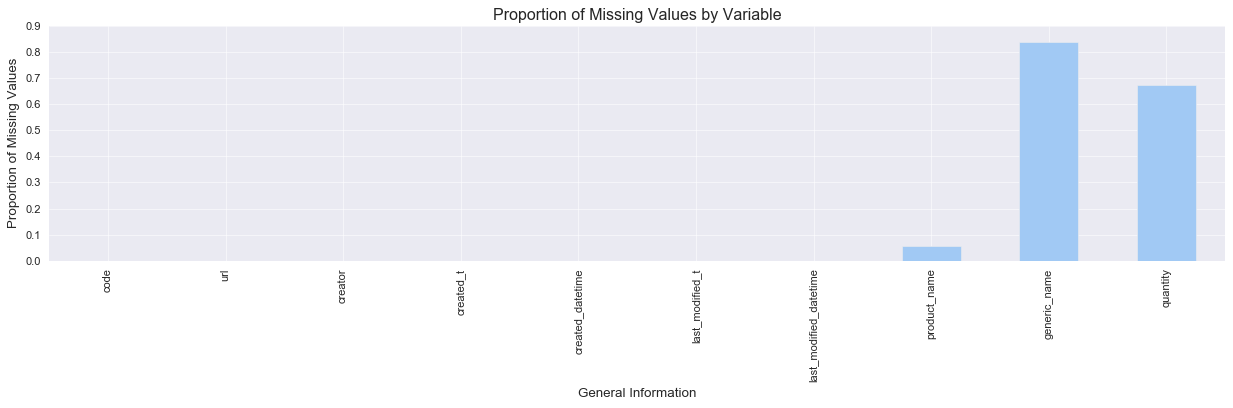

In [2389]:
def plot_missing_data(df, section_name):
    plt.figure(figsize=[15, 3])
    df.isna().mean().plot(kind="bar")
    plt.title("Proportion of Missing Values by Variable")
    plt.xlabel(section_name)
    plt.ylabel("Proportion of Missing Values")
    plt.show()


plot_missing_data(raw_products[general_information], "General Information")

### Tags

In [2390]:
raw_products[tags].sample(5)

,pnns_groups_1,pnns_groups_2,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,...,cities,cities_tags,states,states_fr,states_tags,purchase_places,stores,countries,countries_tags,countries_fr
138686,NaN,NaN,NaN,NaN,"Wegmans, Aldon Food Corporation","wegmans,aldon-food-corporation",NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,US,en:united-states,États-Unis
164518,NaN,NaN,NaN,NaN,Bitsy's Brainfood,bitsy-s-brainfood,NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,US,en:united-states,États-Unis
114536,NaN,NaN,NaN,NaN,"Giant Eagle, Giant Eagle Inc.","giant-eagle,giant-eagle-inc",NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,US,en:united-states,États-Unis
215359,Fish Meat Eggs,Fish and seafood,"conserve,verre","conserve,verre","Leader Price,Sélection de nos Régions","leader-price,selection-de-nos-regions",Rillettes de maquereaux,"en:spreads,en:salted-spreads,en:seafood,en:fis...","Produits à tartiner,Produits à tartiner salés,...",NaN,...,NaN,"concarneau-finistere-france,concarneau-finiste...","en:to-be-checked, en:complete, en:nutrition-fa...","A vérifier,Complet,Informations nutritionnelle...","en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,France,en:france,France
98998,NaN,NaN,NaN,NaN,Grimmway Farms Inc.,grimmway-farms-inc,NaN,NaN,NaN,NaN,...,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,US,en:united-states,États-Unis


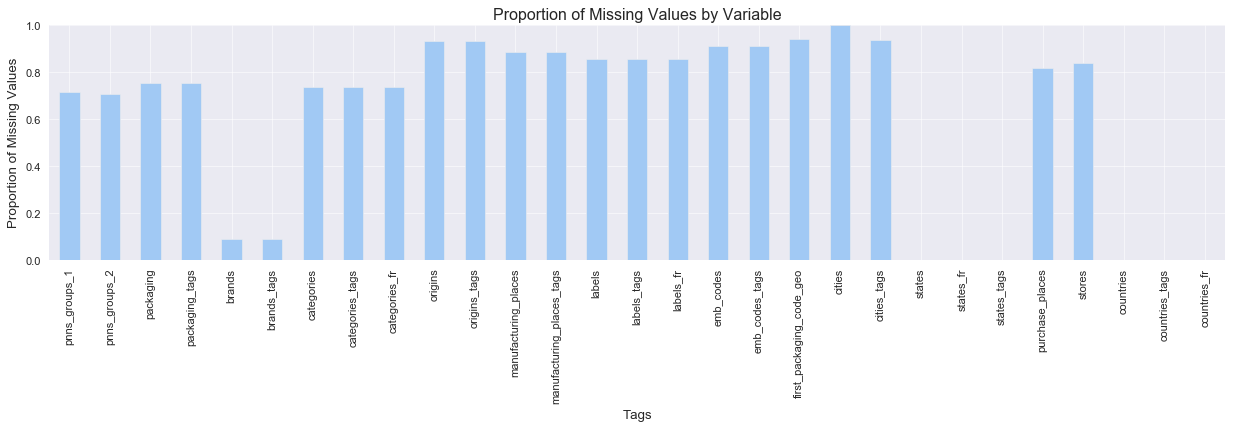

In [2391]:
plot_missing_data(raw_products[tags], "Tags")

### Ingredients

In [2392]:
raw_products[ingredients].sample(5)

,ingredients_text,traces,traces_fr,traces_tags
276474,NaN,NaN,NaN,NaN
222475,"Semoule de blé dur réhydratée, légumes (tomate...",NaN,NaN,NaN
236535,NaN,NaN,NaN,NaN
59241,"Water, soybean oil, olive oil, whole eggs and ...",NaN,NaN,NaN
69508,"Roasted peanuts (peanuts, cottonseed oil),milk...",NaN,NaN,NaN


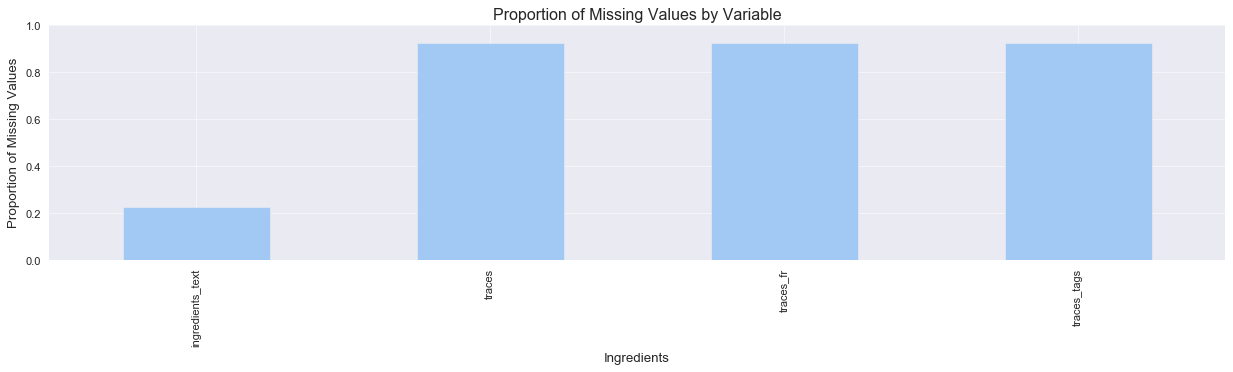

In [2393]:
plot_missing_data(raw_products[ingredients], "Ingredients")

### Miscellaneous Data

In [2394]:
raw_products[misc_data].sample(5)

,serving_size,no_nutriments,additives_n,additives,additives_fr,additives_tags,allergens,allergens_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,main_category,main_category_fr,image_url,image_small_url
250949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,NaN,NaN,NaN,NaN
210500,150g,NaN,2.0,[ galette-de-ble-noir-50 -> fr:galette-de-ble...,"E250 - Nitrite de sodium,E407 - Carraghénanes","en:e250,en:e407",NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,d,en:meals,Plats préparés,http://fr.openfoodfacts.org/images/products/32...,http://fr.openfoodfacts.org/images/products/32...
60559,240 ml (8 fl oz),NaN,0.0,[ coconut-water -> en:coconut-water ] [ wat...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235614,33cl,NaN,0.0,[ eau -> fr:eau ] [ malt-d-orge -> fr:malt-...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,en:beverages,Boissons,http://fr.openfoodfacts.org/images/products/34...,http://fr.openfoodfacts.org/images/products/34...
141637,24.34 g (4 ONZ),NaN,1.0,[ toffee -> en:toffee ] [ butter -> en:butt...,E322 - Lécithines,en:e322,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,e,NaN,NaN,NaN,NaN


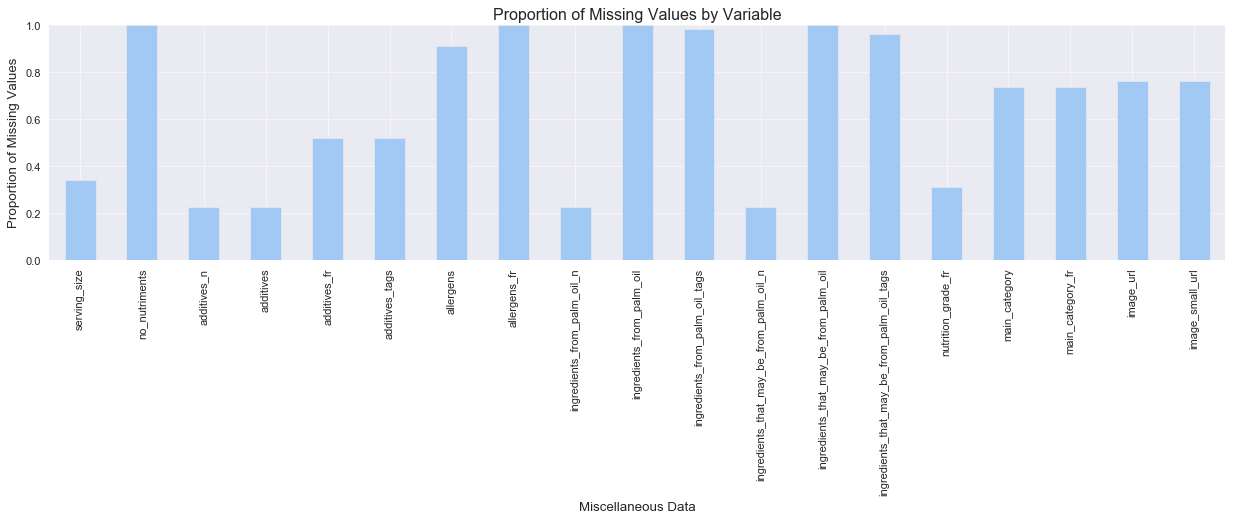

In [2395]:
plot_missing_data(raw_products[misc_data], "Miscellaneous Data")

### Nutrition Facts

In [2396]:
raw_products[nutrition_facts].sample(5)

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,...,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,nutrition_grade_uk,glycemic-index_100g,water-hardness_100g
271669,498.0,NaN,5.1,0.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,NaN
57998,1674.0,NaN,35.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20.0,20.0,NaN,NaN,NaN
135118,192.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
190800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122345,1464.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,NaN


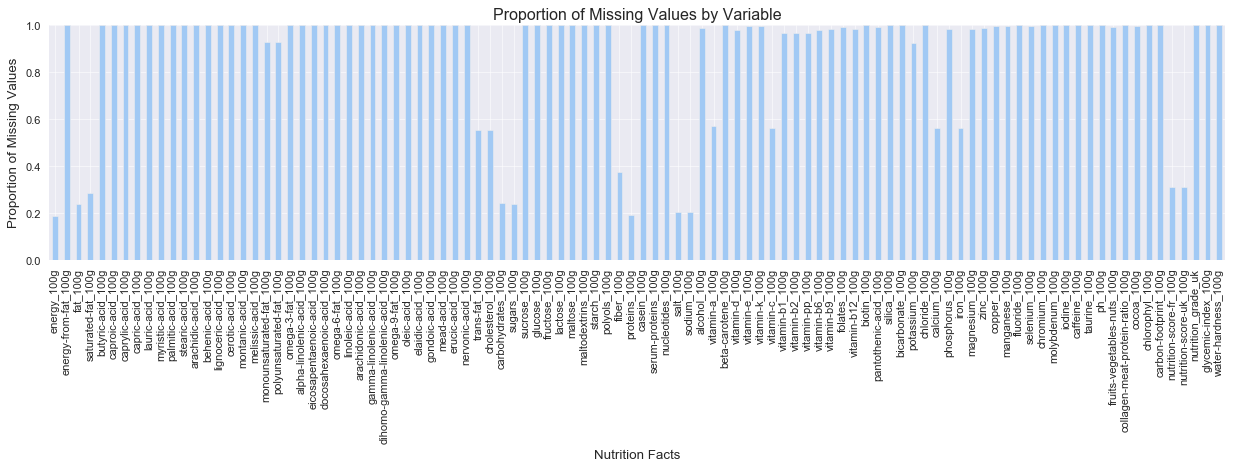

In [2397]:
plot_missing_data(raw_products[nutrition_facts], "Nutrition Facts")

## Feature Selection 

The previous graphs show that there is a lot of missing data in each section, with many features containing more than 50% of null values. 

To start the cleaning process, we will set the cutoff at 50% to have a smaller data set. 

---

In [2398]:
products = raw_products.loc[:, raw_products.isna().mean() < 0.5]

We can also remove the variables with duplicated information along with those that don't carry useful information:

In [2399]:
products.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [2400]:
products = products.drop(
    columns=[
        "creator",
        "created_t",
        "url",
        "last_modified_datetime",
        "created_datetime",
        "brands",
        "ingredients_that_may_be_from_palm_oil_n",
        "last_modified_t",
        "brands_tags",
        "countries_tags",
        "countries",
        "countries_fr",
        "states_tags",
        "additives",
        "states",
        "states_fr",
        "nutrition-score-uk_100g",
        "serving_size",
        "ingredients_text",
        "ingredients_from_palm_oil_n",
        "additives_n",
    ]
)

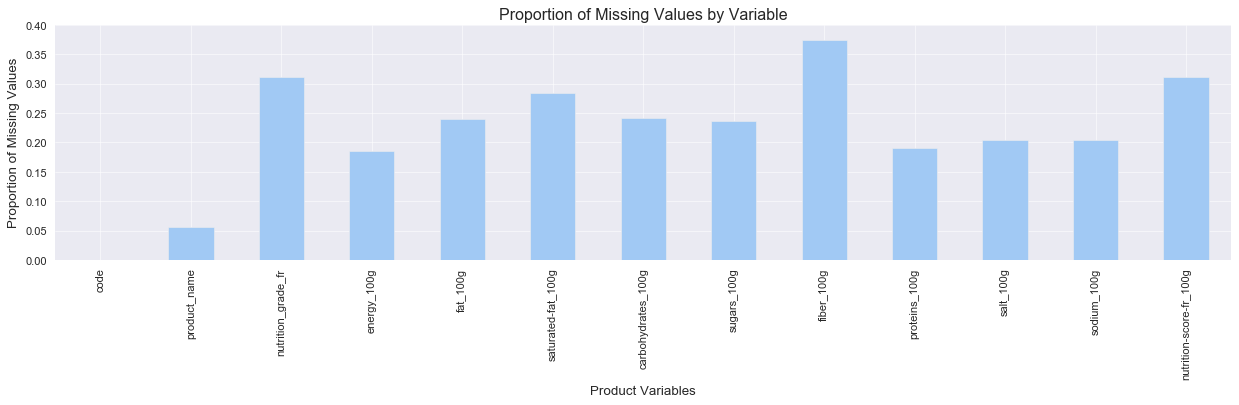

In [2401]:
plot_missing_data(products, "Product Variables")

Check for duplicated entries: 

In [2402]:
products.loc[products.duplicated(subset="code")]

,code,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
481,16117,Colossal Olives With Jalapeno Peppers,NaN,347.0,8.33,NaN,0.00,NaN,NaN,0.00,3.38582,1.333000,NaN
519,24600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560,31233,Super chicken spinach & quinoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,58001,Bramley Apple Crumble,d,1192.0,NaN,7.40,NaN,21.60,2.2,3.20,0.23000,0.090551,12.0
1337,9800800056,Hazelnut Spread + Breadsticks,e,2171.0,26.92,9.62,65.38,44.23,3.8,7.69,0.63500,0.250000,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280571,54491472,Coca-Cola,e,180.0,0.00,0.00,10.60,10.60,0.0,0.00,0.00000,0.000000,14.0
280572,54491496,Diet coke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281938,58449410003,Natures Path organic frosted berry toaster pas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300376,78742087108,Juice Cocktail Blended With Another Juice From...,NaN,192.0,0.00,NaN,11.67,11.67,NaN,0.00,0.05334,0.021000,NaN


In [2403]:
products = products.loc[~products.duplicated(subset="code")]

# Data Cleaning

Check the column types to see whether there is erroneous data:

In [2404]:
products.dtypes

code                        object
product_name                object
nutrition_grade_fr          object
energy_100g                float64
fat_100g                   float64
saturated-fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
nutrition-score-fr_100g    float64
dtype: object

The types are coherent with the nature of the feature

---

## Outliers

In [2405]:
products.set_index("code", inplace=True)
products.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,2.610290e+05,243803.000000,229486.000000,243500.000000,244895.000000,200819.000000,259823.000000,255420.000000,255373.000000,221147.000000
mean,1.141949e+03,12.730510,5.129695,32.074322,16.004032,2.861811,7.076641,2.028589,0.798802,9.165365
std,6.448174e+03,17.578981,8.013391,29.733480,22.329094,12.869449,8.409363,128.292037,50.513321,9.056116
min,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-15.000000
25%,3.770000e+02,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,1.000000
50%,1.100000e+03,5.000000,1.790000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,10.000000
75%,1.674000e+03,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,16.000000
max,3.251373e+06,714.290000,550.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,40.000000


The min and max values of nutrition information variables suggest that there are some outliers. The rest of the variables however seem to have coherent data.

---


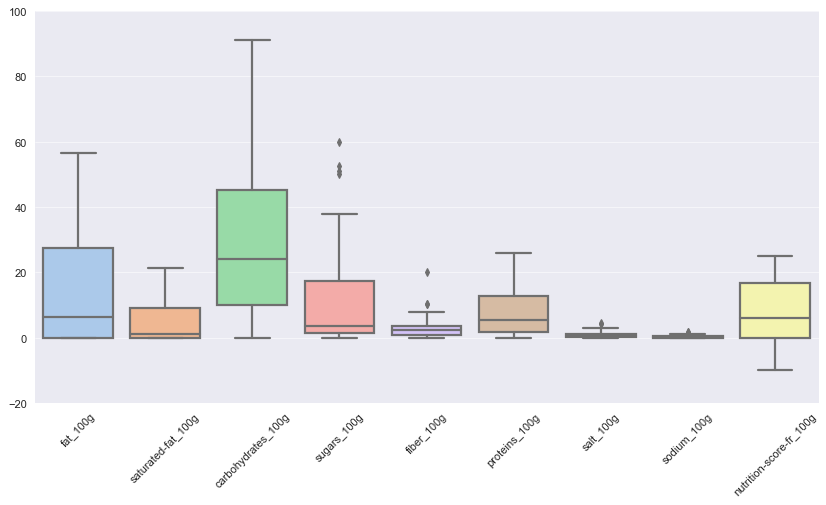

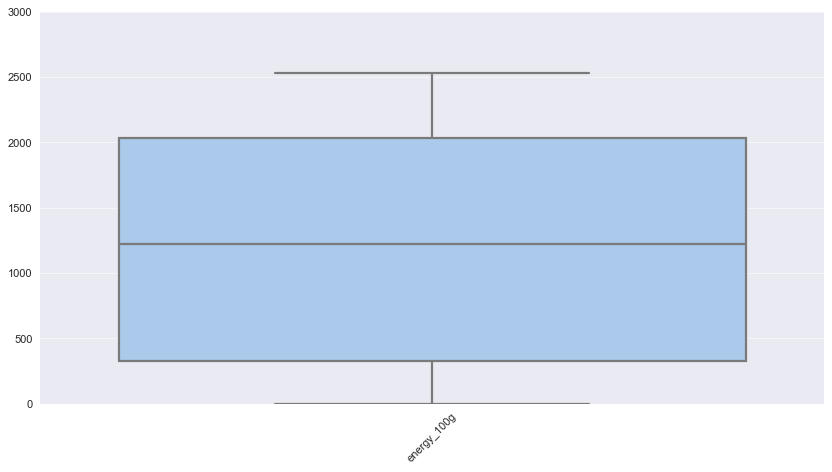

In [2406]:
sample_outliers = products.sample(50).index


def map_outliers(df):
    plt.figure(figsize=[10, 5])
    sns.boxplot(df)
    plt.xticks(rotation=45)
    plt.show()


map_outliers(products.loc[sample_outliers, products.columns != "energy_100g"])
map_outliers(products.loc[sample_outliers, products.columns == "energy_100g"])

### Testing IQR method

In [2407]:
products.isna().mean().mean()

0.23607624150524417

In [2408]:
def remove_outliers(df):
    Q1 = np.nanpercentile(df, 25)
    Q3 = np.nanpercentile(df, 75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[(df < lower_bound) | (df > upper_bound)] = np.nan
    return df


df = products.loc[:, ~products.columns.isin(["product_name", "nutrition_grade_fr"])]
products_without_outliers = df.apply(remove_outliers, axis=0)
products_without_outliers.isna().mean().mean()

0.27843743275147437

The IQR method removes 10% of data, which seems way too much. 
In addition, the product nutrition values are not really comparable using such method, therefore a lot of values would be wrongly considered outliers.

We can try applying this method to a subgroup of products that are more likely to have similar value range:

In [2409]:
products = products.merge(
    raw_products[["pnns_groups_1", "pnns_groups_2", "code"]],
    left_index=True,
    right_on="code",
)

In [2410]:
products["pnns_groups_1"].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [2411]:
mapping = {
    "vegetable|fruit": "Fruits and vegetables",
    "Sugary": "Sugary snacks",
    "sauces": "Fat and sauces",
    "Salty": "Salty snacks",
    "dairy|milk": "Milk and dairy products",
    "Composite": "Composite foods",
    "Fish|Meat|Eggs": "Fish Meat Eggs",
    "cereals|potatoes": "Cereals and potatoes",
    "Beverage": "Beverages",
}

products.loc[
    products["pnns_groups_1"].str.contains("unknown", case=False, na=False),
    "pnns_groups_1",
] = np.nan

for pattern, replacement in mapping.items():
    products.loc[
        products["pnns_groups_1"].str.contains(
            pattern, case=False, regex=True, na=False
        ),
        "pnns_groups_1",
    ] = replacement

unique_groups = products["pnns_groups_1"].unique()
print(unique_groups)

[nan 'Fruits and vegetables' 'Sugary snacks' 'Cereals and potatoes'
 'Composite foods' 'Fish Meat Eggs' 'Beverages' 'Fat and sauces'
 'Milk and dairy products' 'Salty snacks']


In [2412]:
def get_pnns_groups(group=None):
    groups = {
        "dairy_products": "Milk and dairy products",
        "fruits_veggies": "Fruits and vegetables",
        "sugary_snacks": "Sugary snacks",
        "composite_foods": "Composite foods",
        "fish_meat_eggs": "Fish Meat Eggs",
        "beverages": "Beverages",
        "fat_sauces": "Fat and sauces",
        "cereals_potatoes": "Cereals and potatoes",
        "salty_snacks": "Salty snacks",
    }

    if group:
        return products.loc[products["pnns_groups_1"] == groups[group]]
    else:
        return {
            name: products.loc[products["pnns_groups_1"] == group]
            for name, group in groups.items()
        }


pnns_groups_1 = get_pnns_groups()

In [2413]:
products["pnns_groups_2"].unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes', 'Bread',
       'Legumes', 'Pizza pies and quiche', 'Meat', 'Sweets',
       'Non-sugared beverages', 'Alcoholic beverages',
       'Sweetened beverages', 'Dressings and sauces', 'One-dish meals',
       'vegetables', 'Soups', 'Chocolate products', 'Fruits', 'Sandwich',
       'Cereals', 'Milk and yogurt', 'Fats', 'Cheese', 'Appetizers',
       'Nuts', 'Breakfast cereals', 'Artificially sweetened beverages',
       'Fruit juices', 'Eggs', 'Fish and seafood', 'Dried fruits',
       'Ice cream', 'Processed meat', 'Potatoes', 'Dairy desserts',
       'Fruit nectars', 'pastries', 'Tripe dishes', 'fruits',
       'Salty and fatty products', 'cereals', 'legumes', 'nuts'],
      dtype=object)

In [2414]:
products.loc[
    products["pnns_groups_2"].str.contains("unknown", case=False, na=False),
    "pnns_groups_2",
] = np.nan
products.loc[products["pnns_groups_2"].notna(), "pnns_groups_2"] = products.loc[
    products["pnns_groups_2"].notna(), "pnns_groups_2"
].str.capitalize()

products["pnns_groups_2"].unique()

array([nan, 'Vegetables', 'Biscuits and cakes', 'Bread', 'Legumes',
       'Pizza pies and quiche', 'Meat', 'Sweets', 'Non-sugared beverages',
       'Alcoholic beverages', 'Sweetened beverages',
       'Dressings and sauces', 'One-dish meals', 'Soups',
       'Chocolate products', 'Fruits', 'Sandwich', 'Cereals',
       'Milk and yogurt', 'Fats', 'Cheese', 'Appetizers', 'Nuts',
       'Breakfast cereals', 'Artificially sweetened beverages',
       'Fruit juices', 'Eggs', 'Fish and seafood', 'Dried fruits',
       'Ice cream', 'Processed meat', 'Potatoes', 'Dairy desserts',
       'Fruit nectars', 'Pastries', 'Tripe dishes',
       'Salty and fatty products'], dtype=object)

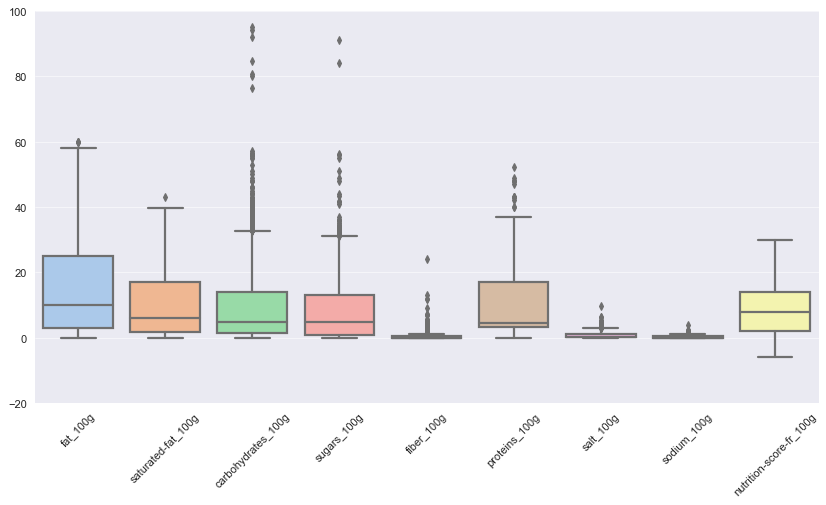

In [2415]:
map_outliers(
    get_pnns_groups("dairy_products").loc[
        :, get_pnns_groups("dairy_products").columns != "energy_100g"
    ]
)

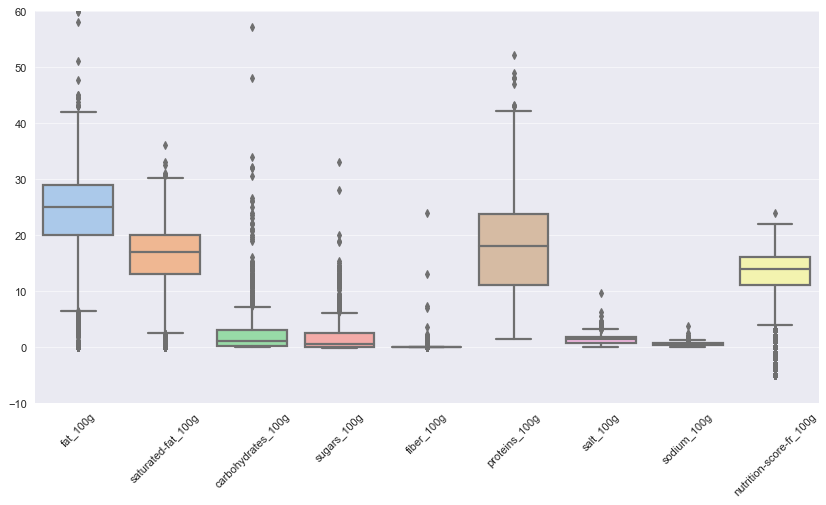

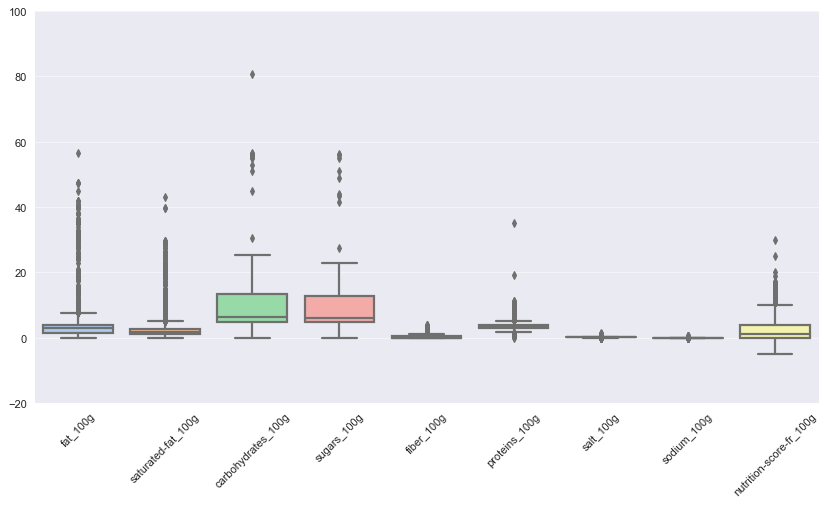

In [2416]:
cheeses = products.loc[products["pnns_groups_2"] == "Cheese"]
milk_yogurts = products.loc[products["pnns_groups_2"] == "Milk and yogurt"]

map_outliers(cheeses.loc[:, cheeses.columns != "energy_100g"])
map_outliers(milk_yogurts.loc[:, milk_yogurts.columns != "energy_100g"])

There seems to be too many outliers identified with the IQR method even when products are grouped by pnns groups. 

We will therefore try a more business oriented approach to handling outliers

---

### Removing nutritional information outliers

Identifying outliers by the non null values outside of the 0-100 range for nutrition information:

In [2417]:
nutrition_facts = [
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g",
]


def count_outliers(df=products):
    print(
        len(
            np.where(
                ((df[nutrition_facts] < 0) | (df[nutrition_facts] > 100))
                & df[nutrition_facts].notna()
            )[0]
        )
    )


count_outliers()

246


In [2418]:
products[nutrition_facts] = np.where(
    ((products[nutrition_facts] < 0) | (products[nutrition_facts] > 100))
    & products[nutrition_facts].notna(),
    np.NAN,
    products[nutrition_facts],
)

count_outliers()

0


We can also remove all products whose carbs, fats and proteins amount to more than 100g:

In [2419]:
erroneous_nutrition_facts = products.loc[
    products["carbohydrates_100g"] + products["fat_100g"] + products["proteins_100g"]
    > 101
]
erroneous_nutrition_facts

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code
74,Organic Whole Brown Rice Flour,NaN,1891.0,3.23,NaN,96.77,NaN,6.4,12.90,NaN,NaN,NaN,NaN,NaN,33572
94,Unsalted Dry Roasted Almonds,NaN,2791.0,56.67,5.00,20.00,6.67,13.3,26.67,NaN,NaN,NaN,NaN,NaN,34784
129,Organic Rolled Rye Flakes,NaN,1674.0,2.00,NaN,84.00,NaN,16.0,16.00,NaN,NaN,NaN,NaN,NaN,38706
134,Organic Arboria Rice,NaN,1490.0,2.22,NaN,95.56,NaN,2.2,13.33,NaN,NaN,NaN,NaN,NaN,39208
220,Chocolate Scone,e,2912.0,39.29,23.21,80.36,46.43,3.6,5.36,0.63500,0.250,25.0,NaN,NaN,2046231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317225,Broccoli Chips,c,1987.0,20.00,5.00,90.00,30.00,15.0,5.00,0.00000,0.000,10.0,NaN,NaN,8855897000129
317226,Cherry Tomato Chips,d,1883.0,20.00,5.00,90.00,40.00,15.0,5.00,0.00000,0.000,12.0,NaN,NaN,8855897000136
317453,Milk Rusk,d,1971.0,12.50,7.00,78.00,23.00,3.0,11.00,1.16840,0.460,17.0,NaN,NaN,8901063136465
317701,Dates,a,1569.0,6.25,1.25,67.50,15.00,10.0,30.00,0.00000,0.000,-2.0,NaN,NaN,896245070353


In [2420]:
products = products.drop(erroneous_nutrition_facts.index)
products.shape

(319517, 15)

### Removing energy feature outliers

For the energy feature, we can identify all products with energy levels that are superior to the usual maximum range for 100g worth of food, which would be about 3770kJ:

In [2421]:
products.loc[products["energy_100g"] > 3770]

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code
698,"Bunge, Clear Liquid Soybean Frying Oil",NaN,3887.0,100.0,14.29,0.0,NaN,NaN,0.0,0.000,0.0,NaN,NaN,NaN,78684962026
772,Ginger Candy Sweetened With Raw Cane,NaN,4435.0,0.0,NaN,90.0,90.0,NaN,0.0,0.000,0.0,NaN,NaN,NaN,8274333381
3786,All-Vegetable Shortening,NaN,3837.0,100.0,25.00,0.0,NaN,NaN,0.0,0.000,0.0,NaN,NaN,NaN,11110846242
3810,All Vegetable Shortening,NaN,3837.0,100.0,29.17,0.0,NaN,NaN,0.0,0.000,0.0,NaN,NaN,NaN,11110847478
5440,Traditional Dusseldorf Mustard,NaN,5690.0,0.0,NaN,0.0,0.0,NaN,0.0,3.302,1.3,NaN,NaN,NaN,11150090834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316771,Virgin Coconut Oil,NaN,3887.0,100.0,71.43,0.0,NaN,NaN,0.0,0.000,0.0,NaN,NaN,NaN,8850367991839
316772,100% Virgin Coconut Oil,NaN,3887.0,100.0,71.43,0.0,NaN,NaN,0.0,0.000,0.0,NaN,NaN,NaN,8850367991914
317171,NaN,NaN,87217.0,0.0,NaN,18.1,8.8,NaN,3.8,0.000,0.0,NaN,NaN,NaN,8854404001734
319695,Miel,e,5925.0,NaN,0.00,NaN,82.0,0.0,0.0,0.000,0.0,20.0,NaN,NaN,9310804500189


We can replace the energy value for all products that contain 100g of fat to 3770:

In [2422]:
products.loc[products["fat_100g"] == 100, "energy_100g"] = 3770

products.loc[products["energy_100g"] > 3770]

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code
772,Ginger Candy Sweetened With Raw Cane,NaN,4435.0,0.0,NaN,90.0,90.00,NaN,0.0,0.00000,0.000000,NaN,NaN,NaN,8274333381
5440,Traditional Dusseldorf Mustard,NaN,5690.0,0.0,NaN,0.0,0.00,NaN,0.0,3.30200,1.300000,NaN,NaN,NaN,11150090834
15660,Tamalito Candy,e,5439.0,0.0,0.0,90.0,80.00,0.0,0.0,0.40640,0.160000,21.0,NaN,NaN,19962333026
20070,Bread Mix,e,10757.0,0.0,0.0,NaN,14.29,0.0,0.0,5.62356,2.214000,23.0,NaN,NaN,23545202883
27849,100% Natural Non-Stick Canola Cooking Spray Oil,NaN,6975.0,0.0,0.0,0.0,NaN,NaN,0.0,0.00000,0.000000,NaN,NaN,NaN,32251079443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313506,"Nusco, Chocolate Spread, Chocolate",e,231199.0,NaN,NaN,NaN,NaN,NaN,NaN,0.01016,0.004000,25.0,NaN,NaN,8710573641501
313852,Cornetto Mini X8 Fruit,e,5644.0,NaN,13.0,NaN,24.00,0.0,3.7,0.12000,0.047244,25.0,NaN,NaN,8711200595631
317171,NaN,NaN,87217.0,0.0,NaN,18.1,8.80,NaN,3.8,0.00000,0.000000,NaN,NaN,NaN,8854404001734
319695,Miel,e,5925.0,NaN,0.0,NaN,82.00,0.0,0.0,0.00000,0.000000,20.0,NaN,NaN,9310804500189


For the remaining energy outliers we can recalculate the value based on fats, carbs and proteins:

In [2423]:
def calculate_energy(row):
    fat = row["fat_100g"] if not np.isnan(row["fat_100g"]) else 0
    carbohydrates = (
        row["carbohydrates_100g"] if not np.isnan(row["carbohydrates_100g"]) else 0
    )
    proteins = row["proteins_100g"] if not np.isnan(row["proteins_100g"]) else 0
    return (fat * 37) + (carbohydrates * 17) + (proteins * 17)


products.loc[products["energy_100g"] > 3770, "energy_100g"] = products.loc[
    products["energy_100g"] > 3770
].apply(calculate_energy, axis=1)

products.loc[products["energy_100g"] > 3770]

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code


## Missing Data

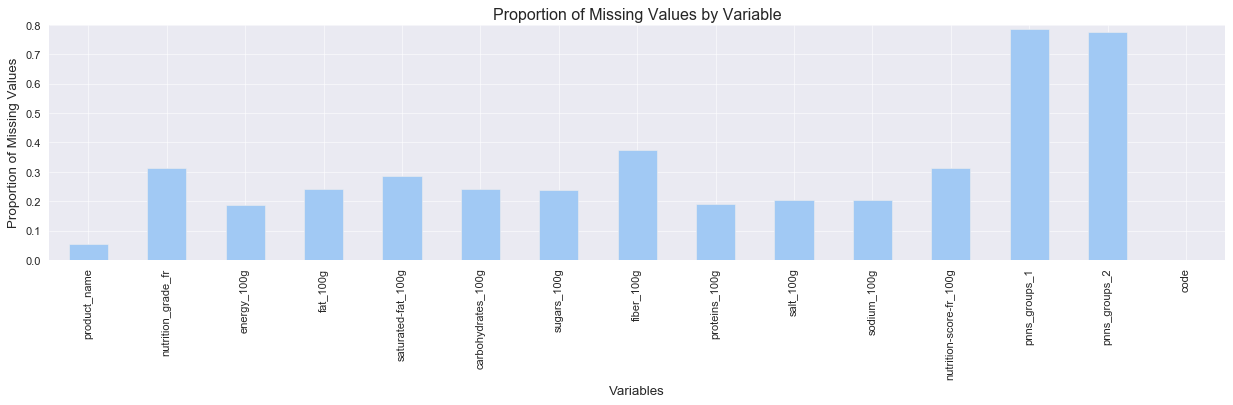

In [2424]:
plot_missing_data(products, "Variables")

### Removing products with little data

We will drop all products with more than 60% of missing nutrition information as they contain too little data to base our suggestions on:

In [2425]:
products_with_missing_data = products.loc[
    products[nutrition_facts].isna().mean(axis=1) > 0.6
]
products_with_missing_data.shape[0] / products.shape[0] * 100

19.951990034959017

In [2426]:
products = products.drop(products_with_missing_data.index)

We will drop all products that contain only 0s and null values: 

In [2427]:
nutrition_facts.append("energy_100g")
numeric_values = nutrition_facts.copy()
numeric_values.append("nutrition-score-fr_100g")

In [2428]:
products_with_empty_data = products[
    np.all((products[numeric_values] == 0) | np.isnan(products[numeric_values]), axis=1)
]
products_with_all_0 = products[np.all(products[numeric_values] == 0, axis=1)].shape[0]

display(products_with_empty_data)

print(
    "Out of the "
    + str(products_with_empty_data.shape[0])
    + " products with missing data, "
    + str(products_with_all_0)
    + " has all values set to 0."
)
print(
    "About "
    + str(products_with_empty_data.shape[0] / products.shape[0] * 100)
    + "percent of data will be dropped."
)

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code
252,Dieter's Herbal Tea,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,105000417
483,Naturally Flavored Sparkling Mountain Spring W...,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,16571910303
484,"Kevin Durant Kd 35 Limited Edition, Naturally ...",NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,16571910310
13384,"Kevin Durant Kd 35 Limited Edition, Naturally ...",NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,16571910310
485,Coconut Pineapple Naturally Flavored Sparkling...,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,16571940331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317444,Tea Bags,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,8901035053608
318331,Coca-cola zéro,b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Beverages,Non-sugared beverages,90357725
318526,Oxygizer,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Beverages,Non-sugared beverages,9120002550011
320316,Peppermint,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,9373536635635


Out of the 3553 products with missing data, 490 has all values set to 0.
About 1.3891549730809682percent of data will be dropped.


In [2429]:
products = products.drop(products_with_empty_data.index)

In [2430]:
products.isna().mean().mean()

0.15807634257680647

In [2431]:
products.shape

(252214, 15)

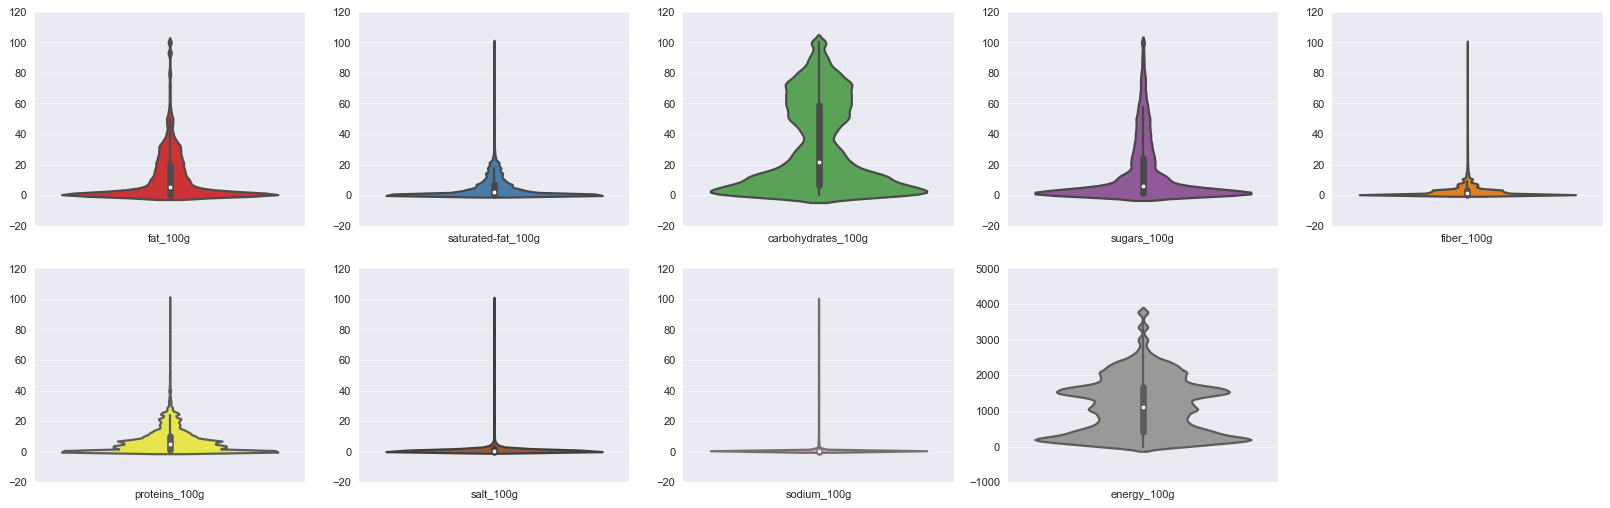

In [2432]:
def plot_nutri_violin(df, feature=None):
    if feature:
        plt.figure(figsize=[3, 3])
        sns.violinplot(df[[feature]])
        plt.show()
    else:
        color_palette = sns.color_palette("Set1", len(nutrition_facts))
        plt.figure(figsize=(20, 6))
        for i, feature in enumerate(nutrition_facts):
            plt.subplot(2, 5, i + 1)
            sns.violinplot(df[[feature]], palette=[color_palette[i]])
        plt.show()


plot_nutri_violin(products)

### Calculating missing energy values

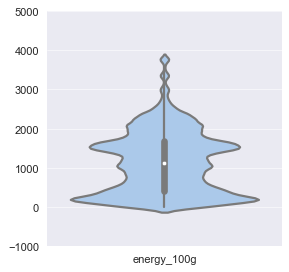

In [2433]:
products.loc[products["energy_100g"].isna(), "energy_100g"] = products.loc[
    products["energy_100g"].isna()
].apply(calculate_energy, axis=1)

plot_nutri_violin(products, "energy_100g")

### Filling in values with 0

Fiber is mostly found in plant-based products, therefore all other products fiber value can be set to 0 if the value is NaN:

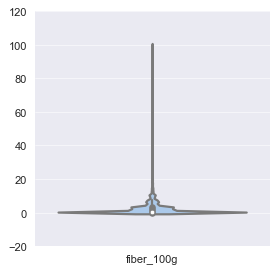

In [2434]:
products.loc[
    ~(products["pnns_groups_1"].isin(["Fruits and vegetables", "Cereals and potatoes"]))
    & (products["fiber_100g"].isna()),
    "fiber_100g",
] = 0
plot_nutri_violin(products, "fiber_100g")

In [2435]:
products["fiber_100g"].isna().mean()

0.007382619521517441

### Testing IterativeImputer with correlated features

To determine whether we can use the IterativeImputer method to fill in missing nutrition fact values, we will first identify whether there are significant correlations between features:

#### Correlation matrix

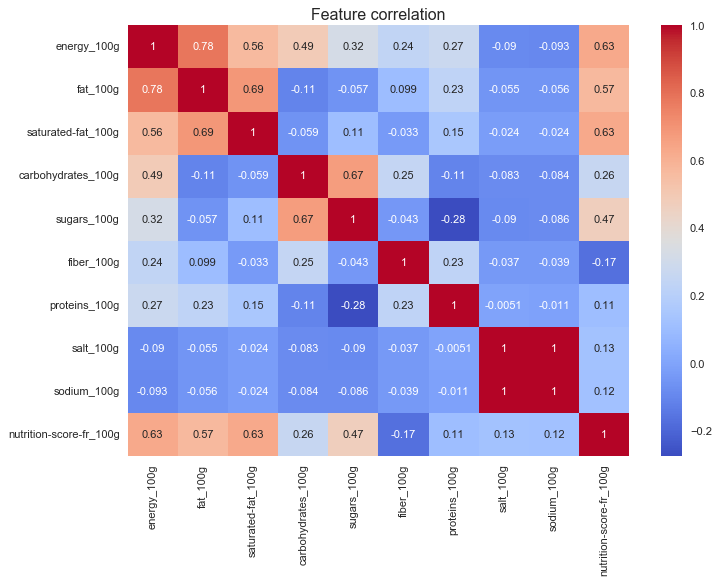

In [2436]:
sns.heatmap(products.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.title("Feature correlation")
plt.show()

The most interesting relationships are between saturated fats and the nutrition score and between energy and nutri score, as in both cases, a 0.6 suggests that the higher the amount of saturated fats or energy, the higher the nutri score. 

The correlation between salt and sodium suggests that keeping both features would be redundant, we will therefore drop one of them

In [2437]:
products = products.drop(columns=["salt_100g"])
numeric_values.remove("salt_100g")
nutrition_facts.remove("salt_100g")

#### Correlations by food groups 

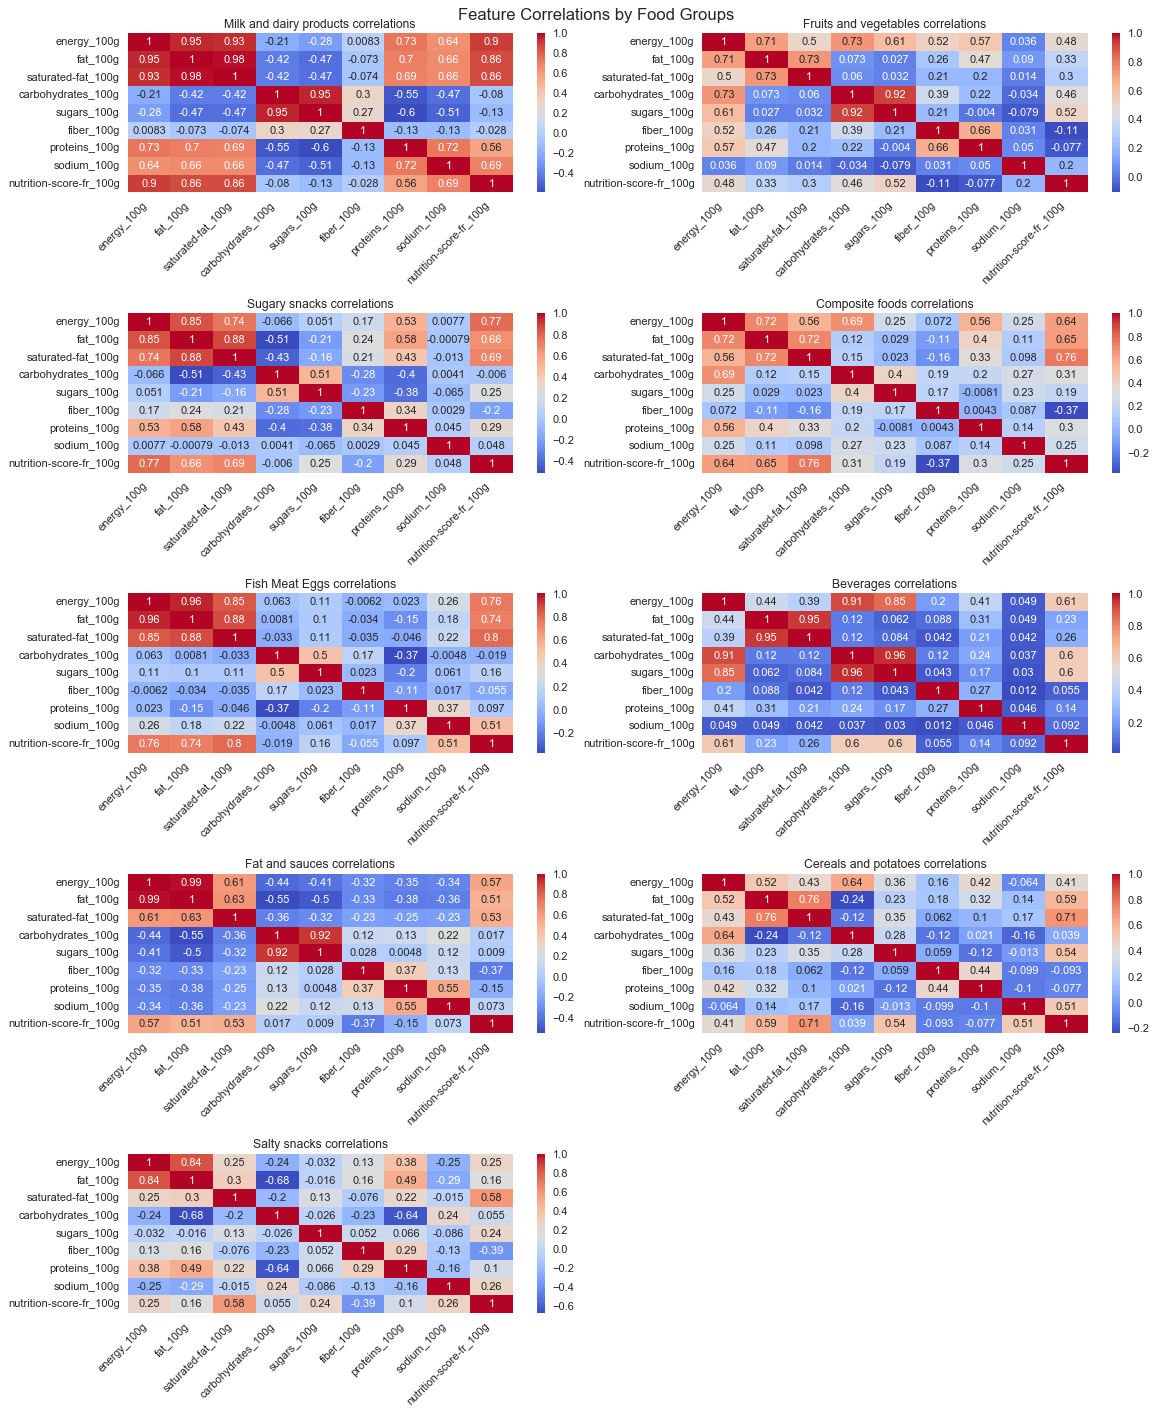

In [2438]:
fig = plt.figure(figsize=(15, 18))
for i, (group_name, group_df) in enumerate(get_pnns_groups().items()):
    i += 1
    ax = plt.subplot(5, 2, i)
    correlation_matrix = group_df.corr(numeric_only=True)
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, ax=ax)
    ax.set_title(group_df.iloc[0]["pnns_groups_1"] + " correlations", fontsize=11)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
fig.suptitle("Feature Correlations by Food Groups", fontsize=15)
plt.tight_layout()
plt.show()

Food groups have an impact on correlations, which suggests that null values cannot be filled in using the same method over the entire data set without taking food groups into consideration

---

### Testing KNN

In [2439]:
def test_knn(df, train_subset, target, plot=False):
    train = df.dropna(axis=0, how="any", subset=numeric_values)
    xtrain, xtest, ytrain, ytest = train_test_split(
        train[train_subset], train[target], train_size=0.8
    )
    scaler = StandardScaler()
    scaler.fit(xtrain)
    xtrain = scaler.transform(xtrain)
    xtest = scaler.transform(xtest)

    errors = []
    for k in range(2, 15):
        knn = neighbors.KNeighborsClassifier(k)
        errors.append(100 * (1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
    if plot:
        plt.plot(range(2, 15), errors, "o-")
        plt.show()
    else:
        display(
            df["pnns_groups_1"].iloc[0] + str(train.shape) + ": " + str(np.min(errors))
        )


for i, group in get_pnns_groups().items():
    test_knn(group, nutrition_facts, "nutrition-score-fr_100g")

'Milk and dairy products(6548, 14): 32.67175572519084'

'Fruits and vegetables(3193, 14): 40.845070422535215'

'Sugary snacks(9554, 14): 50.026164311878595'

'Composite foods(5430, 14): 71.36279926335175'

'Fish Meat Eggs(5141, 14): 42.3712342079689'

'Beverages(4953, 14): 34.00605449041373'

'Fat and sauces(3487, 14): 47.70773638968482'

'Cereals and potatoes(5549, 14): 40.63063063063063'

'Salty snacks(2261, 14): 59.602649006622514'

The KNN method yields very poor results when attempting to predict the nutrition score based on all other numeric values 

---

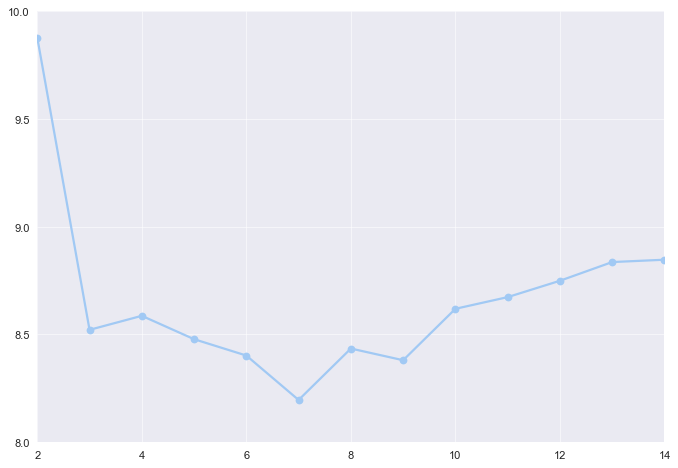

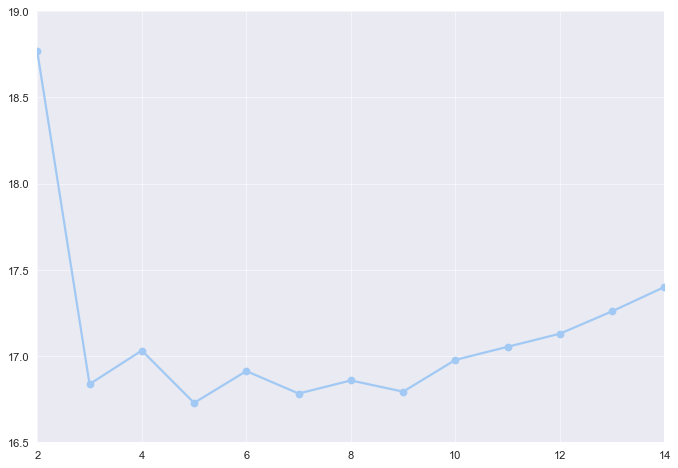

In [2440]:
pnns_groups = products.dropna(
    axis=0, how="any", subset=["pnns_groups_2", "pnns_groups_1"]
)
test_knn(pnns_groups, numeric_values, "pnns_groups_1", True)
test_knn(pnns_groups, numeric_values, "pnns_groups_2", True)

In [2441]:
train = pnns_groups.dropna(axis=0, how="any", subset=numeric_values)
xtrain, xtest, ytrain, ytest = train_test_split(
    train[numeric_values], train["pnns_groups_1"], train_size=0.8
)

knn = neighbors.KNeighborsClassifier(5)
knn.fit(xtrain, ytrain)

predicted = knn.predict(xtest)

misclassified_indices = ytest[ytest != predicted].index

comparison_df = pd.DataFrame(
    {"Original": ytest, "Predicted": predicted}, index=ytest.index
)
misclassified_rows = comparison_df.loc[
    comparison_df["Original"] != comparison_df["Predicted"]
]
misclassified_rows.sample(30)

,Original,Predicted
189817,Composite foods,Fat and sauces
219427,Composite foods,Milk and dairy products
213838,Cereals and potatoes,Composite foods
263218,Cereals and potatoes,Salty snacks
252331,Fish Meat Eggs,Composite foods
241370,Beverages,Fat and sauces
190073,Fruits and vegetables,Fat and sauces
259103,Fish Meat Eggs,Composite foods
179207,Beverages,Cereals and potatoes
218273,Fish Meat Eggs,Composite foods


The KNN method yields a better score when attempting to predict the pnns group 1 but when comparing the actual results, the predicted group is often too far from the expected result. We will therefore not be applying this imputation method as it could compromise further group based analyses. 

### Testing IterativeImputer method

Since there is an overall high correlation between saturated fat, fat, sugars, carbs, energy and the nutrition score, we will apply the IterativeImputer to these features

In [2442]:
subset_columns = [
    "fat_100g",
    "energy_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
]
iterative_imputer_data = products.copy()

In [2443]:
def apply_iterative_imputer(df, min, max):
    iterative_imputer = IterativeImputer(
        missing_values=np.nan, min_value=min, max_value=max
    )
    iterative_imputer.fit(df)
    return iterative_imputer.transform(df)

In [2444]:
iterative_imputer_data[subset_columns] = apply_iterative_imputer(
    iterative_imputer_data[subset_columns], 0, 100
)

subset_columns.append("nutrition-score-fr_100g")
iterative_imputer_data[subset_columns] = apply_iterative_imputer(
    iterative_imputer_data[subset_columns], -15, 40
)

In [2445]:
numeric_values

['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'sodium_100g',
 'energy_100g',
 'nutrition-score-fr_100g']

In [2446]:
def imputation_comparison(before, after):
    fig = plt.figure(figsize=(15, 10))
    for i, feature in enumerate(numeric_values):
        ax = plt.subplot(3, 3, i + 1)
        sns.kdeplot(
            x=before[feature], fill=True, color="blue", label="before_imputation"
        )
        sns.kdeplot(x=after[feature], fill=True, color="red", label="after_imputation")
        ax.set_title(feature)
    fig.legend(labels=["Before", "After"])
    fig.suptitle("Ditribution Comparison Before and After Imputation")
    plt.tight_layout()
    plt.show()

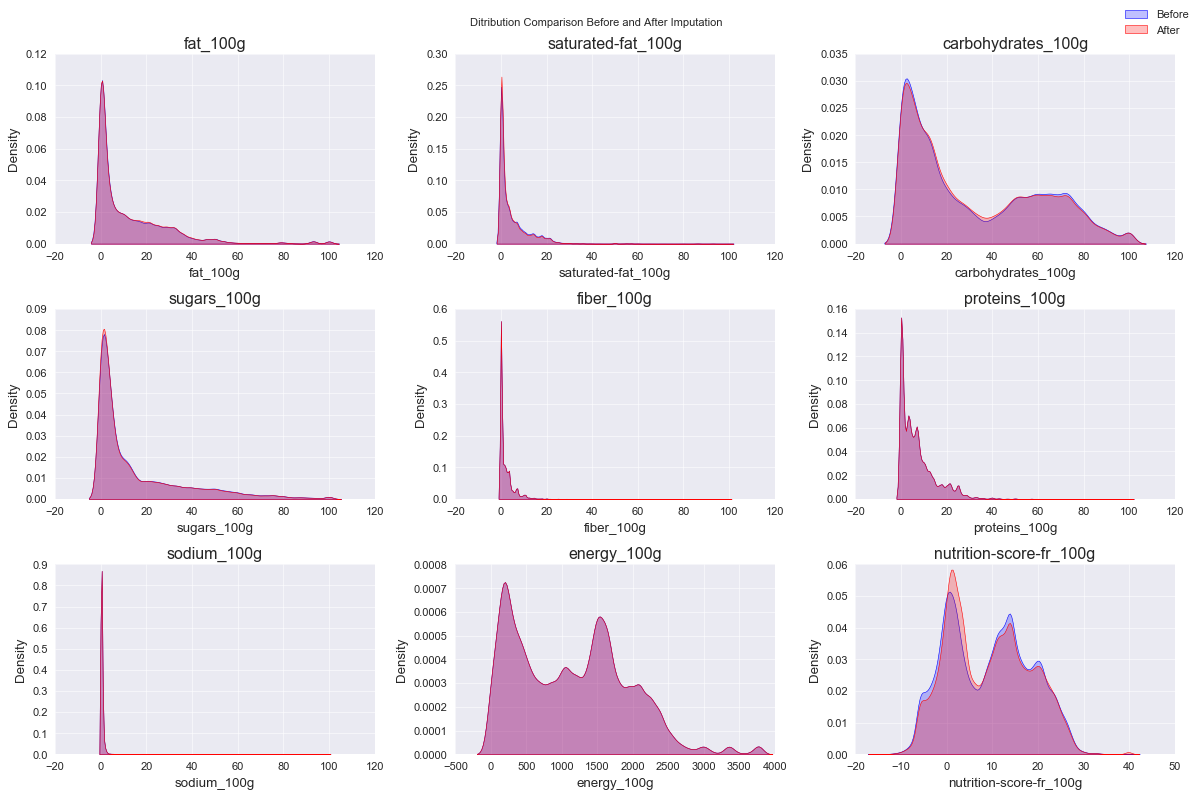

In [2447]:
imputation_comparison(products, iterative_imputer_data)

Based on the distribution comparison, the iterative imputer method seems to yield good results as the distributions of the imputed features do not vary much

In [2448]:
products = iterative_imputer_data

In [2449]:
products.loc[products["nutrition-score-fr_100g"] > 40]

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code


In [2450]:
products.loc[products["nutrition-score-fr_100g"] > 40, "nutrition-score-fr_100g"] = 40

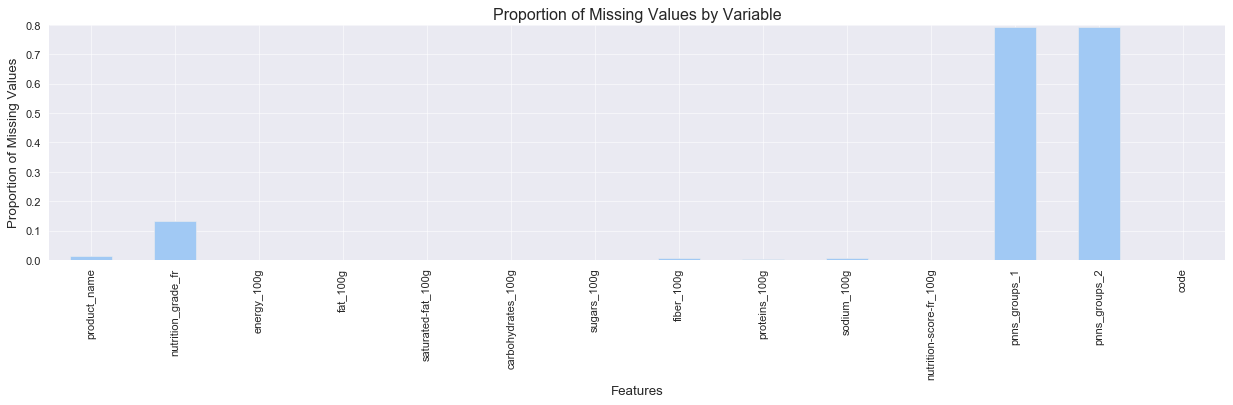

In [2451]:
plot_missing_data(products, "Features")

### Testing SimpleImputer

In [2452]:
median_imputed_data = products.copy()

In [2453]:
def impute_median_data(df_to_impute, orginal_df):
    imputed_data = df_to_impute.copy()
    imputer = SimpleImputer(missing_values=np.nan, strategy="median")
    imputer.fit(df_to_impute[nutrition_facts])
    imputed_data[nutrition_facts] = imputer.transform(df_to_impute[nutrition_facts])
    orginal_df.loc[imputed_data.index] = imputed_data

In [2454]:
for i, group in get_pnns_groups().items():
    impute_median_data(group, median_imputed_data)

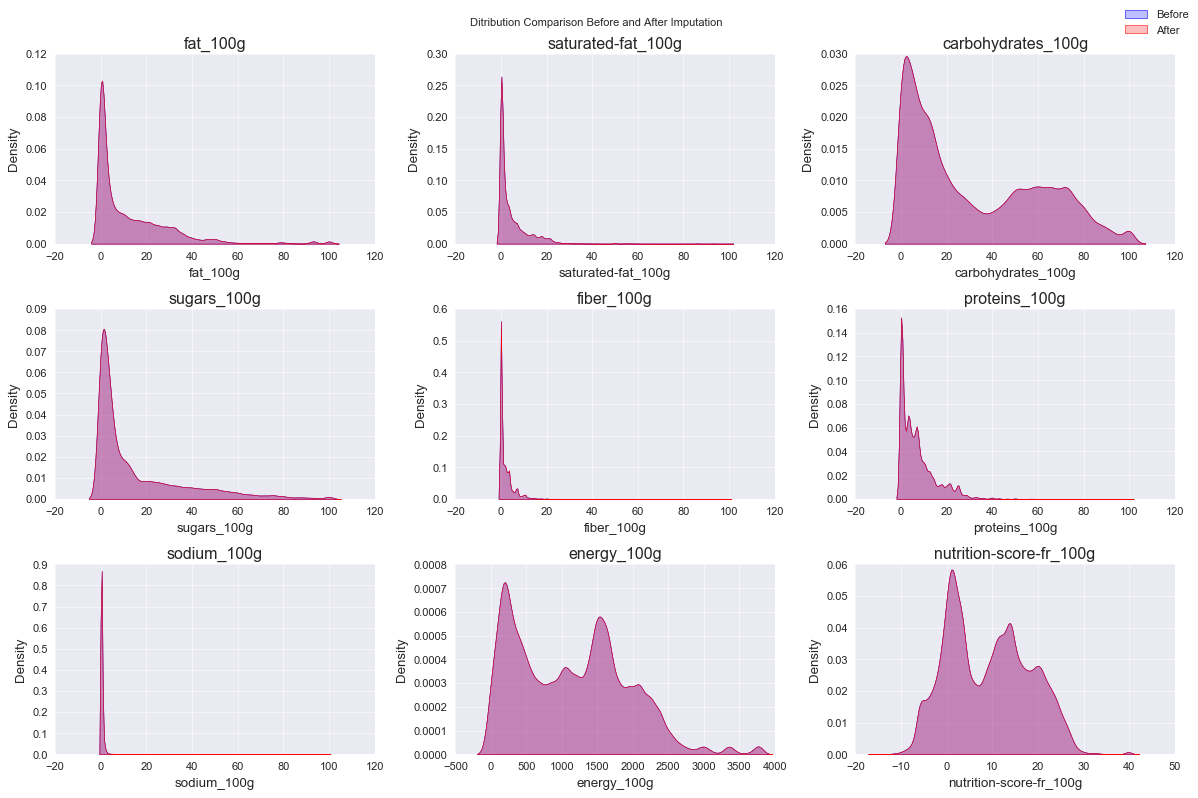

In [2455]:
imputation_comparison(products, median_imputed_data)

This comparison plot suggests that the imputation of the remaining missing values using the median of each feature for each food group yielded satisfactory results as it did not impact the overall distribution

In [2456]:
products = median_imputed_data

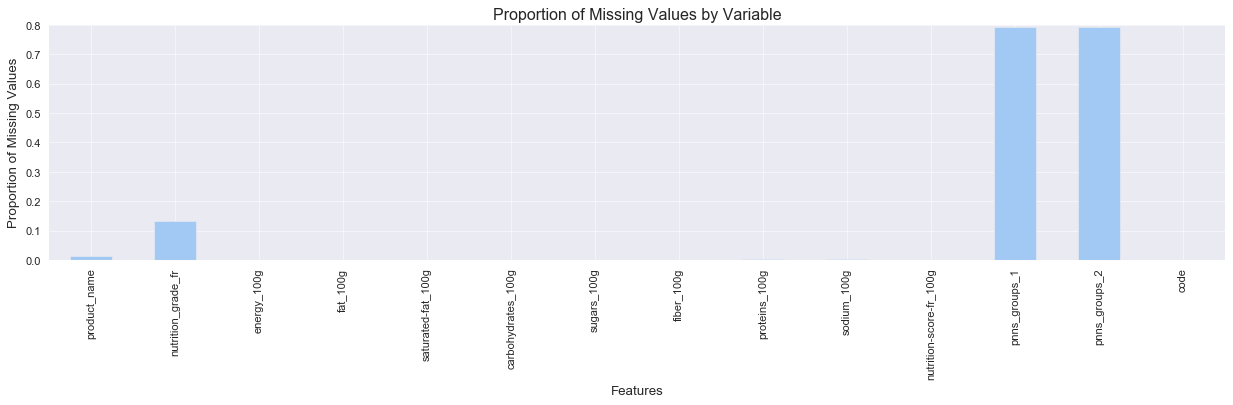

In [2457]:
plot_missing_data(products, "Features")

In [2458]:
products.isna().mean()

product_name               0.012263
nutrition_grade_fr         0.130956
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
fiber_100g                 0.000000
proteins_100g              0.003434
sodium_100g                0.004627
nutrition-score-fr_100g    0.000000
pnns_groups_1              0.792656
pnns_groups_2              0.792200
code                       0.000000
dtype: float64

Since proteins and sodium are not correlated to any other feature and since these products are not categorized, we will drop the products with missing values

In [2459]:
products.shape

(252214, 14)

In [2460]:
products

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code
1,Banana Chips Sweetened (Whole),d,2243.0,28.570000,28.570000,64.290000,14.290000,3.6,3.57,0.000000,14.000000,NaN,NaN,4530
2,Peanuts,b,1941.0,17.860000,0.000000,60.710000,17.860000,7.1,17.86,0.250000,0.000000,NaN,NaN,4559
3,Organic Salted Nut Mix,d,2540.0,57.140000,5.360000,17.860000,3.570000,7.1,17.86,0.482000,12.000000,NaN,NaN,16087
4,Organic Polenta,NaN,1552.0,1.430000,1.813491,77.140000,36.337867,5.7,8.57,NaN,10.953373,NaN,NaN,16094
5,Breadshop Honey Gone Nuts Granola,NaN,1933.0,18.270000,1.920000,63.460000,11.540000,7.7,13.46,NaN,8.735441,NaN,NaN,16100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320751,Tartines craquantes bio au sarrasin,a,1643.0,2.800000,0.600000,74.800000,2.600000,5.9,13.00,0.267717,-4.000000,Cereals and potatoes,Bread,9847548283004
320756,Test NF App,NaN,569.0,31.000000,7.633326,12.200000,9.600000,1.1,2.10,0.433071,6.380715,NaN,NaN,989898
320757,Amandes,b,2406.0,34.776744,3.730000,50.383235,3.890000,12.2,21.22,0.039370,0.000000,NaN,NaN,9900000000233
320763,Thé vert Earl grey,c,21.0,0.200000,0.200000,0.500000,0.500000,0.2,0.50,0.010000,2.000000,Beverages,Non-sugared beverages,99111250


In [2461]:
products = products.drop(
    products.loc[
        products["sodium_100g"].isna() | products["proteins_100g"].isna()
    ].index
)
products.isna().mean()

product_name               0.011805
nutrition_grade_fr         0.124156
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
fiber_100g                 0.000000
proteins_100g              0.000000
sodium_100g                0.000000
nutrition-score-fr_100g    0.000000
pnns_groups_1              0.791015
pnns_groups_2              0.790587
code                       0.000000
dtype: float64

In [2462]:
def fill_nutrition_grade(df):
    nutri_score_equivalence = {
        "a": [-16, -2],
        "b": [-2, 3],
        "c": [3, 11],
        "d": [11, 16],
        "e": [16, 40],
    }

    def map_to_grade(score):
        for grade, (lower_bound, upper_bound) in nutri_score_equivalence.items():
            if lower_bound <= score <= upper_bound:
                return grade
        display(grade)
        return None

    df["nutrition_grade_fr"] = df["nutrition-score-fr_100g"].apply(map_to_grade)

    return df


products = fill_nutrition_grade(products)

## Analysis

In [2518]:
products.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
count,250233.000000,250233.000000,250233.000000,250233.000000,250233.000000,250233.000000,250233.000000,250233.000000,250233.000000
mean,1136.095218,12.887716,4.788070,32.202843,15.645141,2.244400,7.130602,0.651842,9.072591
std,788.764131,17.286963,7.566964,28.602492,20.896183,4.196694,8.089547,2.646185,8.939506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,397.000000,0.000000,0.000000,6.670000,1.300000,0.000000,0.800000,0.030000,1.108700
50%,1117.000000,5.560000,1.670000,21.430000,5.400000,0.500000,4.850000,0.236220,9.000000
75%,1674.000000,20.590000,6.670000,57.140000,23.330000,3.100000,10.000000,0.551000,16.000000
max,3770.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000


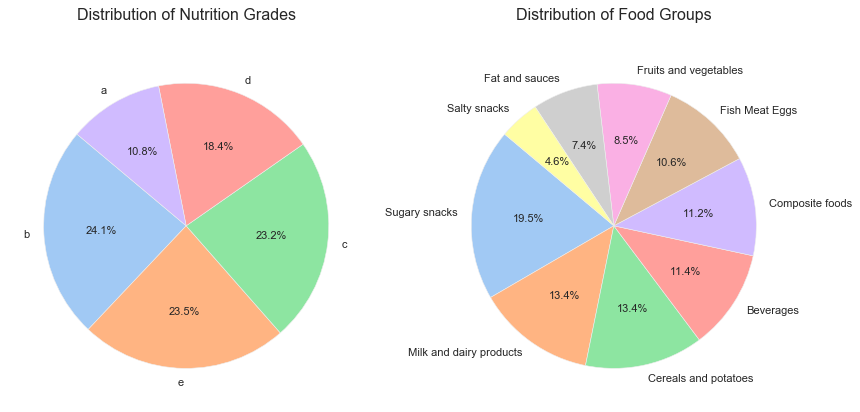

In [2517]:
def plot_piechart(dfs):
    fig = plt.figure(figsize=(10, 8))
    i = 0
    for df, title in dfs:
        i += 1
        ax = plt.subplot(1, 2, i)
        plt.pie(
            df,
            labels=df.index,
            autopct="%1.1f%%",
            startangle=140,
        )
        plt.title(title, pad=25)
    plt.show()


plot_piechart(
    [
        (
            products["nutrition_grade_fr"].value_counts(),
            "Distribution of Nutrition Grades",
        ),
        (products["pnns_groups_1"].value_counts(), "Distribution of Food Groups"),
    ]
)

## PCA

In [2465]:
products[numeric_values]

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,energy_100g,nutrition-score-fr_100g
1,28.570000,28.570000,64.290000,14.29,3.6,3.57,0.000000,2243.0,14.000000
2,17.860000,0.000000,60.710000,17.86,7.1,17.86,0.250000,1941.0,0.000000
3,57.140000,5.360000,17.860000,3.57,7.1,17.86,0.482000,2540.0,12.000000
7,18.750000,4.690000,57.810000,15.62,9.4,14.06,0.055000,1833.0,7.000000
12,36.670000,5.000000,36.670000,3.33,6.7,16.67,0.633000,2230.0,12.000000
...,...,...,...,...,...,...,...,...,...
320751,2.800000,0.600000,74.800000,2.60,5.9,13.00,0.267717,1643.0,-4.000000
320756,31.000000,7.633326,12.200000,9.60,1.1,2.10,0.433071,569.0,6.380715
320757,34.776744,3.730000,50.383235,3.89,12.2,21.22,0.039370,2406.0,0.000000
320763,0.200000,0.200000,0.500000,0.50,0.2,0.50,0.010000,21.0,2.000000


In [2466]:
values = products[numeric_values].values
values.shape

(250233, 9)

In [2467]:
names = products["product_name"].values
names

array(['Banana Chips Sweetened (Whole)', 'Peanuts',
       'Organic Salted Nut Mix', ..., 'Amandes', 'Thé vert Earl grey',
       'Sugar Free Drink Mix, Peach Tea'], dtype=object)

In [2468]:
features = numeric_values
features

['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'sodium_100g',
 'energy_100g',
 'nutrition-score-fr_100g']

In [2469]:
scaler = StandardScaler()
scaler.fit(values)

StandardScaler()

In [2470]:
values_scaled = scaler.transform(values)
values_scaled

array([[ 0.90717585,  3.14286898,  1.12183308, ..., -0.24633316,
         1.40334347,  0.5511959 ],
       [ 0.28763258, -0.63276094,  0.99666891, ..., -0.15185735,
         1.02046526, -1.01488923],
       [ 2.55986971,  0.07558265, -0.50145531, ..., -0.0641838 ,
         1.77988265,  0.32746945],
       ...,
       [ 1.26621846, -0.13982781,  0.63562395, ..., -0.23145508,
         1.60999628, -1.01488923],
       [-0.73394857, -0.60633021, -1.10839665, ..., -0.24255413,
        -1.41372738, -0.79116278],
       [-0.74551801,  0.27072421, -1.12587768, ..., -0.24633316,
         1.21190436,  0.85118804]])

In [2471]:
idx = ["mean", "std"]

pd.DataFrame(values_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8
mean,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [2472]:
pca = PCA(n_components=4)
pca.fit(values_scaled)

PCA(n_components=4)

In [2473]:
variance_ratio = (pca.explained_variance_ratio_ * 100).round(2)
variance_ratio_cum = variance_ratio.cumsum().round()
variance_ratio_cum

array([36., 57., 72., 83.])

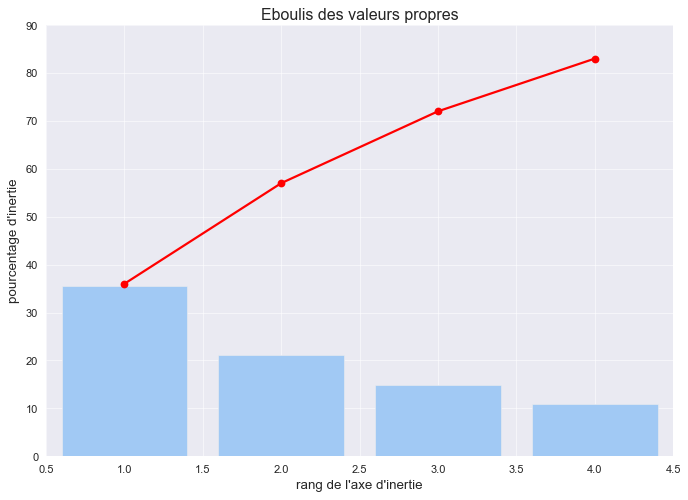

In [2474]:
x_list = range(1, 4 + 1)
plt.bar(x_list, variance_ratio)
plt.plot(x_list, variance_ratio_cum, c="red", marker="o")
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [2475]:
pcs = pd.DataFrame(pca.components_)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,energy_100g,nutrition-score-fr_100g
F1,0.44,0.43,0.22,0.23,0.08,0.14,-0.06,0.52,0.47
F2,0.34,0.24,-0.58,-0.59,0.00,0.37,0.07,-0.01,-0.07
F3,-0.05,-0.21,0.27,-0.11,0.75,0.41,-0.17,0.17,-0.29
F4,-0.05,-0.06,0.10,0.02,0.13,0.10,0.97,0.03,0.08


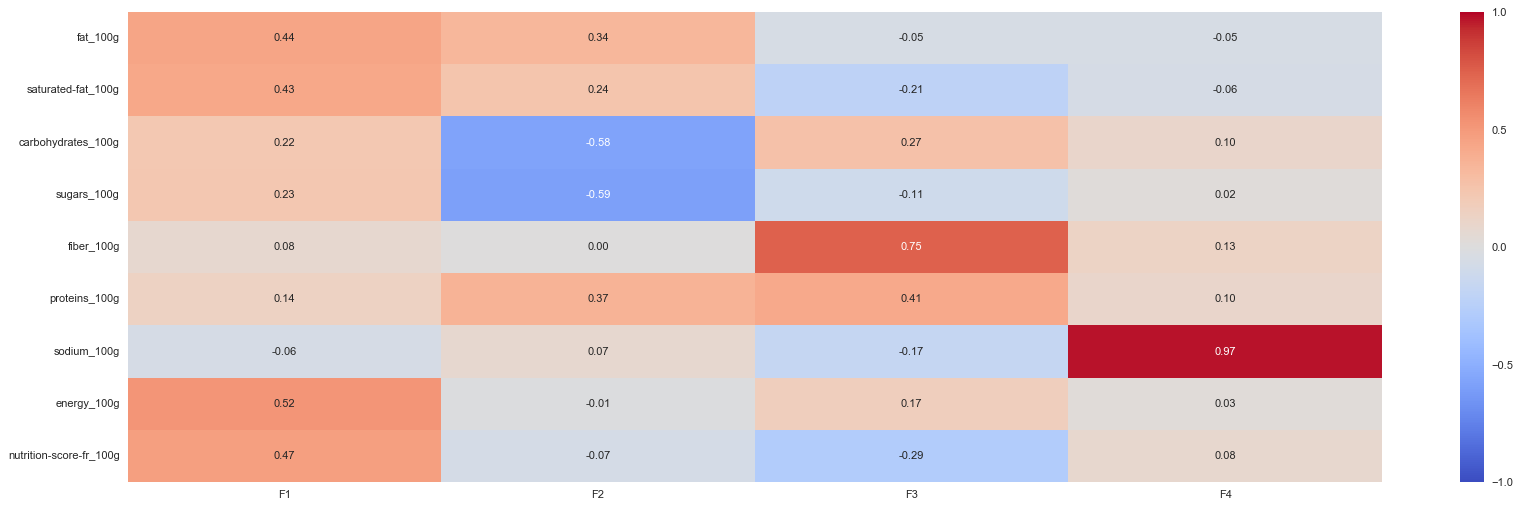

In [2476]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

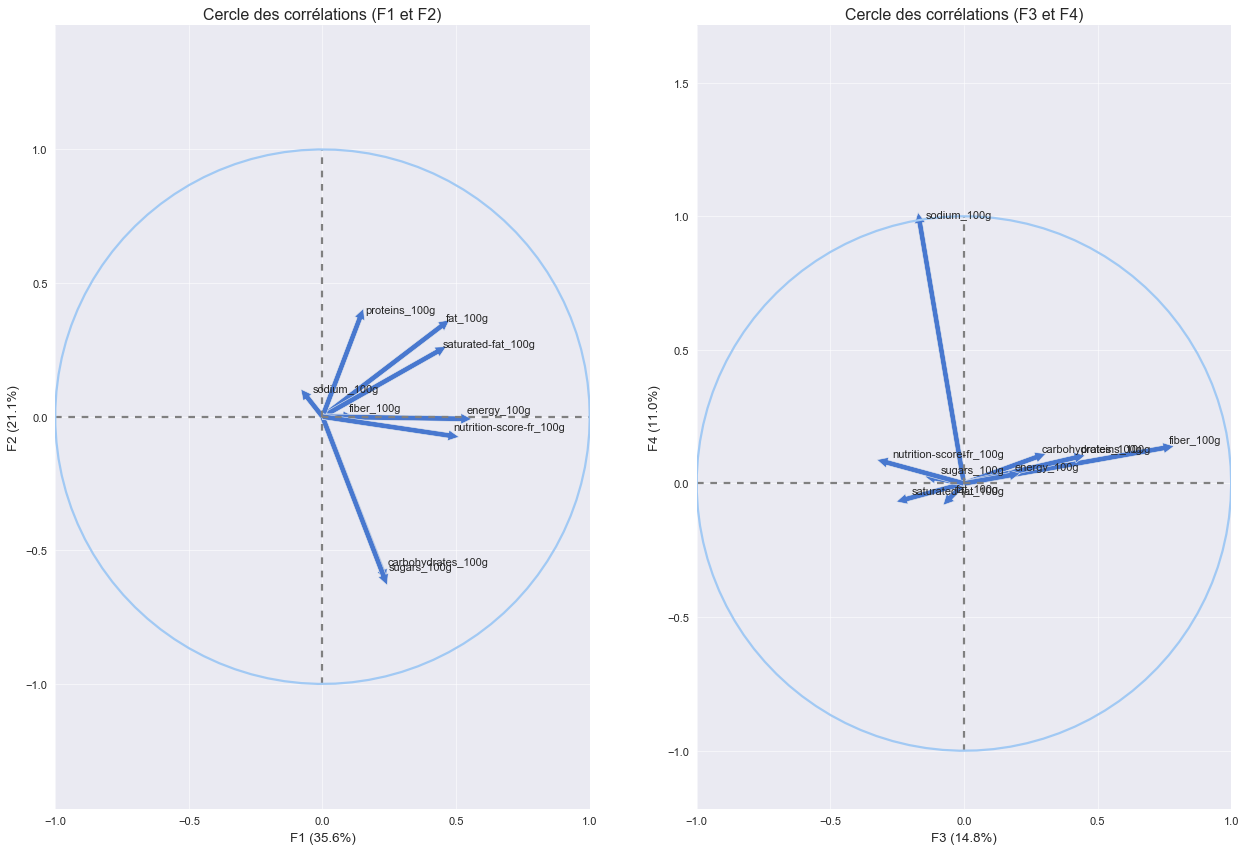

In [2501]:
def plot_correlation_circle(pca, features, components):
    fig = plt.figure(figsize=(15, 10))
    num = 0
    for x, y in components:
        num += 1
        ax = plt.subplot(1, 2, num)
        for i in range(0, pca.components_.shape[1]):
            ax.arrow(
                0,
                0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.04,
                head_length=0.04,
                width=0.02,
            )
            ax.text(
                pca.components_[x, i] + 0.02, pca.components_[y, i] + 0.02, features[i]
            )
        plt.plot([-1, 1], [0, 0], color="grey", ls="--")
        plt.plot([0, 0], [-1, 1], color="grey", ls="--")

        ax.set_xlabel(
            "F{} ({}%)".format(x + 1, round(100 * pca.explained_variance_ratio_[x], 1))
        )
        ax.set_ylabel(
            "F{} ({}%)".format(y + 1, round(100 * pca.explained_variance_ratio_[y], 1))
        )
        ax.set_title("Cercle des corrélations (F{} et F{})".format(x + 1, y + 1))
        an = np.linspace(0, 2 * np.pi, 100)
        plt.plot(np.cos(an), np.sin(an))
        plt.axis("equal")
    plt.show()


plot_correlation_circle(pca, features, [(0, 1), (2, 3)])

In [2478]:
projected_values = pca.transform(values_scaled)
projected_values

array([[ 2.94723925,  0.23300645, -0.22858305, -0.27415399],
       [ 0.43640114, -0.15210635,  2.28191018,  0.2058422 ],
       [ 2.27741488,  1.96013666,  1.4171732 ,  0.10038226],
       ...,
       [ 1.31010697,  1.04531888,  3.29519113,  0.21959522],
       [-2.2403262 ,  0.42046388, -0.73204539, -0.53404718],
       [ 0.24226124,  0.49458162, -1.00396241, -0.39313084]])

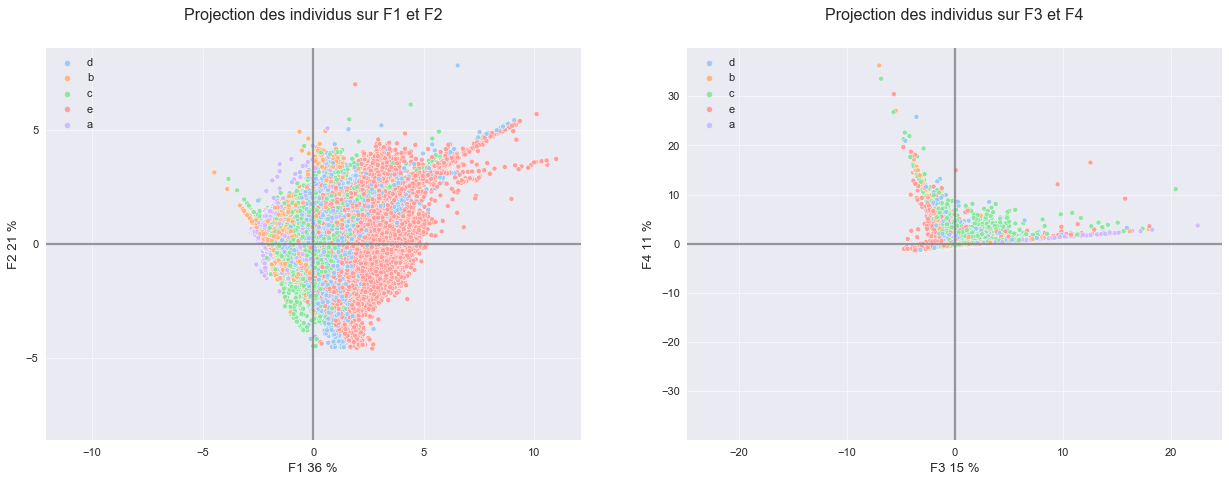

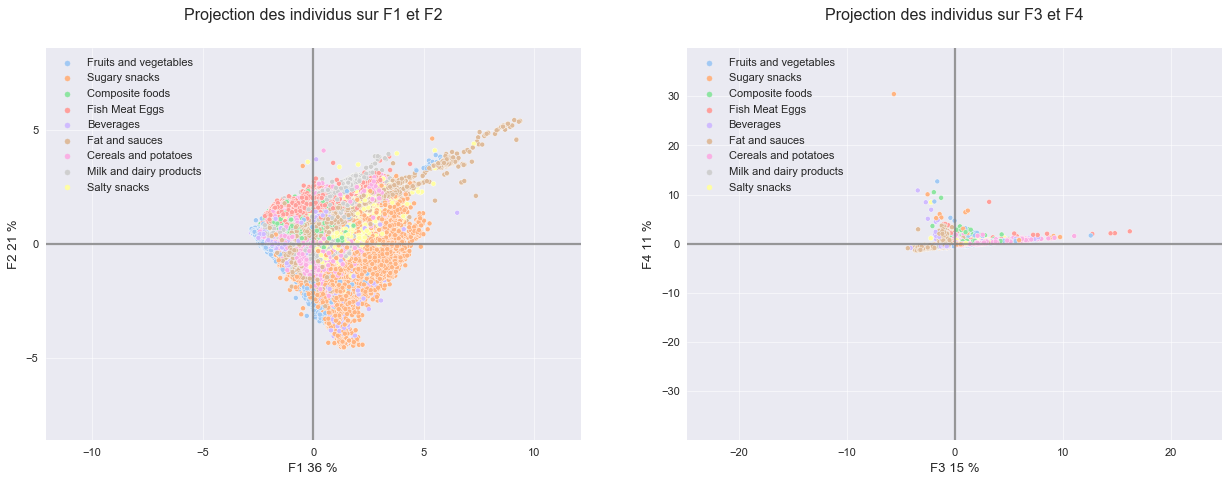

In [2502]:
def display_factorial_planes(X_projected, components, pca, clusters):
    X_ = np.array(X_projected)
    fig = plt.figure(figsize=(15, 5))
    num = 0
    for x, y in components:
        num += 1
        ax = plt.subplot(1, 2, num)

        sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=clusters, ax=ax)

        v1 = str(round(100 * pca.explained_variance_ratio_[x])) + " %"
        v2 = str(round(100 * pca.explained_variance_ratio_[y])) + " %"

        ax.set_xlabel(f"F{x+1} {v1}")
        ax.set_ylabel(f"F{y+1} {v2}")

        x_max = np.abs(X_[:, x]).max() * 1.1
        y_max = np.abs(X_[:, y]).max() * 1.1

        ax.set_xlim(left=-x_max, right=x_max)
        ax.set_ylim(bottom=-y_max, top=y_max)

        plt.plot([-x_max, x_max], [0, 0], color="grey", alpha=0.8)
        plt.plot([0, 0], [-y_max, y_max], color="grey", alpha=0.8)
        plt.legend(loc="upper left")

        plt.title(f"Projection des individus sur F{x+1} et F{y+1}", pad=25)
    plt.show()


display_factorial_planes(
    projected_values, [(0, 1), (2, 3)], pca, products["nutrition_grade_fr"]
)

display_factorial_planes(
    projected_values, [(0, 1), (2, 3)], pca, products["pnns_groups_1"]
)

### ANOVA

anova entre nutrition et category 
anova entre category et fat/carbs/sugar


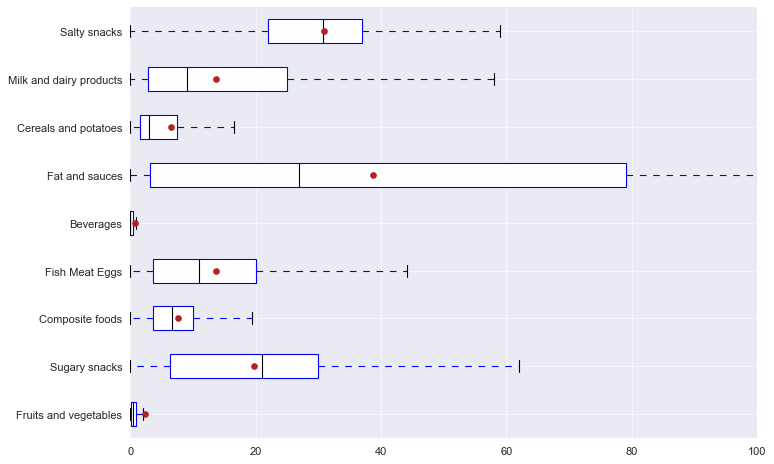

In [2588]:
X = "pnns_groups_1"
Y = "fat_100g"

modalites = products.loc[products[X].notna(), X].unique()
groupes = []
for m in modalites:
    groupes.append(products[products[X] == m][Y])

medianprops = {"color": "black"}
meanprops = {"marker": "o", "markeredgecolor": "black", "markerfacecolor": "firebrick"}

plt.boxplot(
    groupes,
    labels=modalites,
    showfliers=False,
    medianprops=medianprops,
    vert=False,
    patch_artist=True,
    showmeans=True,
    meanprops=meanprops,
)
plt.show()

In [2581]:
def pnns_groups_anova(feature):
    groups = products.groupby("pnns_groups_1").groups
    fruits_and_veggie = products[feature][groups["Fruits and vegetables"]]
    sugary_snacks = products[feature][groups["Sugary snacks"]]
    cereals_potatoes = products[feature][groups["Cereals and potatoes"]]
    composite_foods = products[feature][groups["Composite foods"]]
    fish_meat_eggs = products[feature][groups["Fish Meat Eggs"]]
    beverage = products[feature][groups["Beverages"]]
    fat_sauces = products[feature][groups["Fat and sauces"]]
    milk_dairy = products[feature][groups["Milk and dairy products"]]
    salty_snacks = products[feature][groups["Salty snacks"]]

    print(
        st.f_oneway(
            fruits_and_veggie,
            sugary_snacks,
            cereals_potatoes,
            composite_foods,
            fish_meat_eggs,
            beverage,
            fat_sauces,
            milk_dairy,
            salty_snacks,
        )
    )


pnns_groups_anova("fat_100g")
pnns_groups_anova("carbohydrates_100g")
pnns_groups_anova("nutrition-score-fr_100g")

F_onewayResult(statistic=3534.4035990472817, pvalue=0.0)
F_onewayResult(statistic=12562.443886429066, pvalue=0.0)
F_onewayResult(statistic=5531.006307972058, pvalue=0.0)


In [2587]:
products.loc[products["nutrition_grade_fr"] == "a"]

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,code
19,Organic Oat Groats,a,1096.0,5.950000,1.19,66.670000,2.38,9.5,16.67,0.010000,-6.0,NaN,NaN,18227
173,Fresh Organic Carrots,a,159.0,0.000000,0.00,8.970000,6.41,2.6,1.28,0.077000,-2.0,NaN,NaN,69601
265,Organic Flourless Sprouted 7-Grain Bread,a,983.0,2.940000,0.00,44.120000,2.94,8.8,11.76,0.265000,-6.0,NaN,NaN,1816
331,Romaine Hearts,a,75.0,0.000000,0.00,3.530000,1.18,2.4,1.18,0.006000,-3.0,NaN,NaN,651003214
332,Romaine,a,75.0,0.000000,0.00,3.530000,1.18,2.4,1.18,0.006000,-3.0,NaN,NaN,651041001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320494,Ananas en morceaux,a,206.0,0.000000,0.00,10.400000,9.70,1.9,0.60,0.003937,-5.0,Fruits and vegetables,Fruits,9501006300039
320524,Total 2%,a,305.0,0.602318,1.30,11.840024,3.80,0.0,9.90,0.039370,-4.0,NaN,NaN,9546549536453
320587,Baked Beans In Tomato Sauce,a,418.0,0.770000,0.00,19.230000,7.69,3.8,3.85,0.300000,-2.0,NaN,NaN,9556041602211
320606,Ayam Pure Coconut Water,a,76.1,0.000000,0.00,4.550000,4.00,0.0,0.00,0.034800,-4.0,Beverages,Non-sugared beverages,9556041612081


In [2585]:
groups = products.groupby("nutrition_grade_fr").groups
products["fat_100g"][groups["a"]]

19        5.950000
173       0.000000
265       2.940000
331       0.000000
332       0.000000
            ...   
320494    0.000000
320524    0.602318
320587    0.770000
320606    0.000000
320751    2.800000
Name: fat_100g, Length: 26989, dtype: float64

In [2582]:
def nutri_anova(feature):
    groups = products.groupby("nutrition_grade_fr").groups
    nutri_a = products[feature][groups["a"]]
    nutri_b = products[feature][groups["b"]]
    nutri_c = products[feature][groups["c"]]
    nutri_d = products[feature][groups["d"]]
    nutri_e = products[feature][groups["e"]]

    print(st.f_oneway(nutri_a, nutri_b, nutri_c, nutri_d, nutri_e))


nutri_anova("fat_100g")
nutri_anova("carbohydrates_100g")
nutri_anova("nutrition-score-fr_100g")

F_onewayResult(statistic=27917.263779417153, pvalue=0.0)
F_onewayResult(statistic=9113.060084958759, pvalue=0.0)
F_onewayResult(statistic=864285.0273962822, pvalue=0.0)
